## Donchian Channel

Donchian Channel은 리처드 돈치안(Richard Donchian)에 의해 개발된 기술적 분석 도구로, 시장의 최고가와 최저가를 기반으로 한 가격 채널을 형성한다. 이 도구는 주로 추세를 식별하고, 지지와 저항 수준을 설정하는 데 사용된다.

Donchain Channel은 다음과 같이 구성된다.

- 상단 밴드 (Upper Band): 설정된 기간 동안의 최고가로 설정된다.
- 하단 밴드 (Lower Band): 설정된 기간 동안의 최저가로 설정된다.
- 중간 밴드 (Middle Band): 종종 상단 밴드와 하단 밴드의 평균으로 계산되어 추세의 중심선 역할을 한다.

Donchian Channel의 기본 설정 기간은 20일이 일반적이지만, 이는 투자자의 거래 스타일과 시장 조건에 따라 조정될 수 있다. 채널의 밴드는 설정된 기간 동안의 가격 범위를 나타내며, 이는 시장의 현재 변동성을 반영한다.

상단 밴드를 넘는 경우에는, 주가가 상단 밴드를 넘으면 상승 추세가 시작될 가능성이 높다고 해석된다. 이는 강력한 매수 신호로 간주될 수 있다. 반면 하단 밴드를 넘는 경우에는, 반대로 주가가 하단 밴드를 넘으면 하락 추세가 시작될 가능성이 있다. 이는 매도 신호로 해석될 수 있다.

Donchian Channel은 추세 추종 전략에 주로 사용되며, 채널의 상단과 하단을 통해 자동으로 지지와 저항 수준을 제공한다. 이 채널은 특히 시장의 돌파점을 포착하는 데 유용하며, 장기적인 가격 변동 추세를 감지하는 데 도움을 준다. 또한, 중간 밴드는 추가적인 추세 정보를 제공하여 거래 결정을 지원한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.volatility import donchian_channel_hband, donchian_channel_lband, donchian_channel_mband, donchian_channel_pband, donchian_channel_wband
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
hband = donchian_channel_hband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    fillna = False
)

lband = donchian_channel_lband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    fillna = False
)

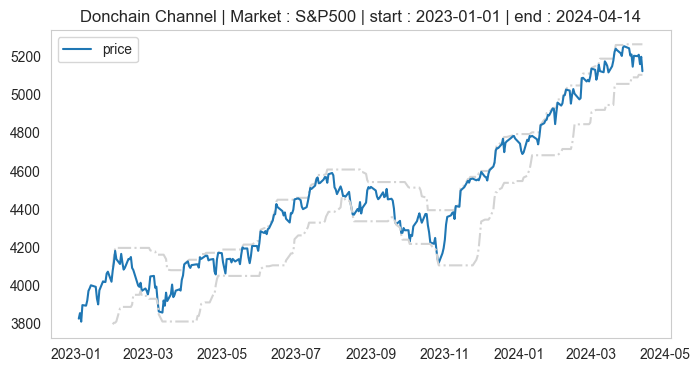

In [6]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'], label = 'price')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)
plt.title(f'Donchain Channel | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

In [7]:
mband = donchian_channel_mband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    fillna = False
)

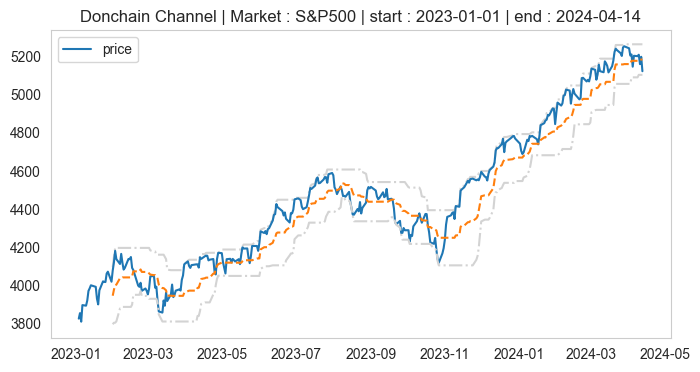

In [9]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)
plt.title(f'Donchain Channel | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

In [10]:
pband = donchian_channel_pband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    fillna = False
)

wband = donchian_channel_wband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    fillna = False
)

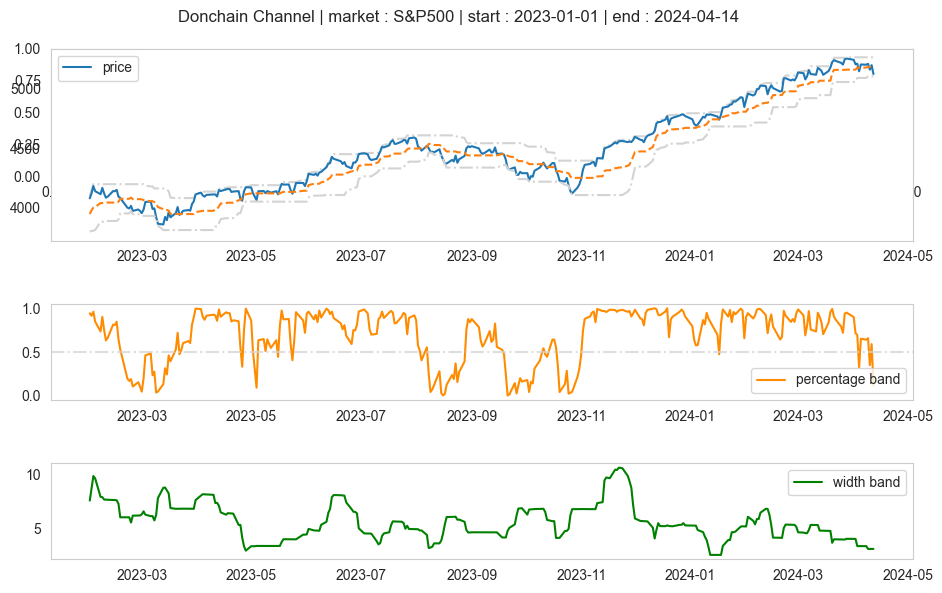

In [15]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'][19:], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(pband, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 0.5, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['percentage band'])

plt.subplot(gs[2])
plt.plot(wband, color = 'green')
plt.grid(False)
plt.legend(['width band'])

plt.suptitle(f'Donchain Channel | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()

### Donchian Channel의 해석

돈치안 채널은 잠재정니 트레이딩 기회를 위한 여러가지 시그널을 제공한다.

- 돌파 : 가격이 상단 밴드 위로 돌파하거나 하단 밴드 아래로 돌파할 경우 추세 방향으로의 잠재적 돌파를 의미한다
- 추세 반전 : 가격이 강력한 추세 이후 중간 선을 넘어간다면 잠재적 추세 반전을 의미한다
- 지지 및 저항 수준 : 상단 밴드와 하단 밴드는 동적 지지 및 저항 수준으로 작용하여 투자자에게 잠재적 진입 및 종료 지점을 제공한다